In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Dataset\income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income')

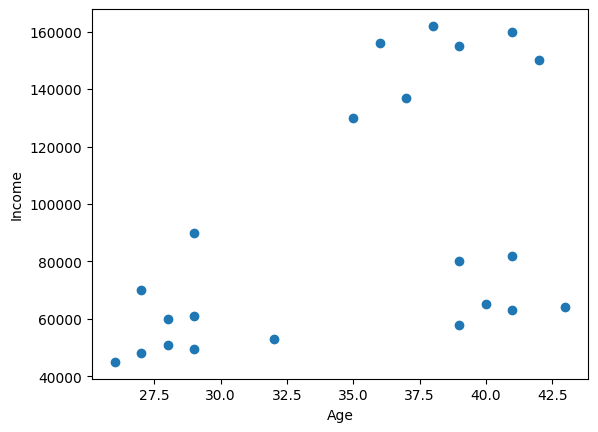

In [3]:
plt.scatter(df[["Age"]] , df[["Income($)"]])
plt.xlabel("Age")
plt.ylabel("Income")

In [4]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[["Age" , "Income($)"]])
df["cluster"] = y_predicted
df.head()

c:\Users\thunk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [5]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

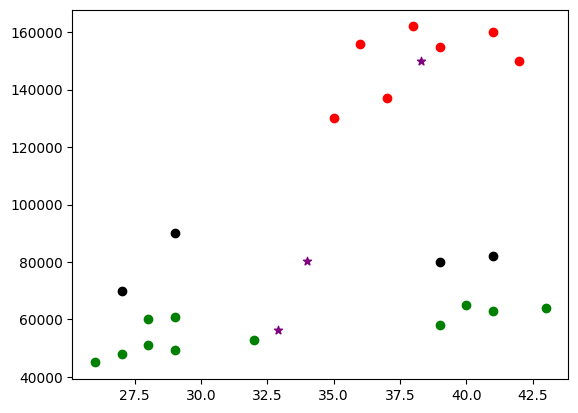

In [6]:
df1 = df[df["cluster"] == 0]
df2 = df[df["cluster"] == 1]
df3 = df[df["cluster"] == 2]
plt.scatter(df1[["Age"]] , df1[["Income($)"]] , color = "green")
plt.scatter(df2[["Age"]] , df2[["Income($)"]] , color = "red")
plt.scatter(df3[["Age"]] , df3[["Income($)"]] , color = "black")
plt.scatter(km.cluster_centers_[: , 0] , km.cluster_centers_[: , 1] , color = "purple" , marker = "*")

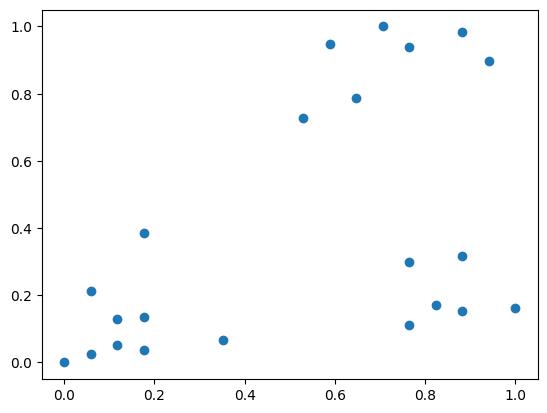

In [7]:
scaler = MinMaxScaler()
scaler.fit(df[["Income($)"]])
df["Income($)"] = scaler.transform(df[["Income($)"]])

df["Age"] = scaler.fit_transform(df[["Age"]])

plt.scatter(df[["Age"]] , df[["Income($)"]])

In [8]:
y_predicted = km.fit_predict(df[["Age" , "Income($)"]])
df["cluster"] = y_predicted

c:\Users\thunk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


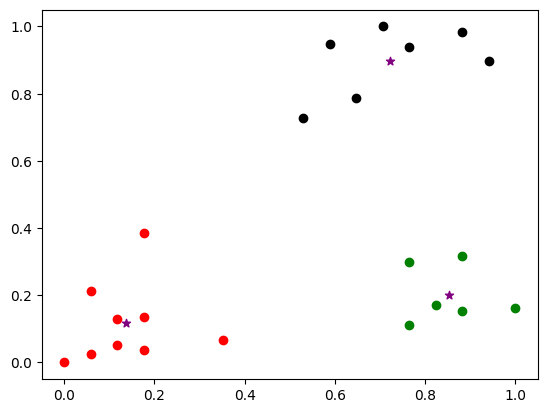

In [9]:
df1 = df[df["cluster"] == 0]
df2 = df[df["cluster"] == 1]
df3 = df[df["cluster"] == 2]
plt.scatter(df1[["Age"]] , df1[["Income($)"]] , color = "green")
plt.scatter(df2[["Age"]] , df2[["Income($)"]] , color = "red")
plt.scatter(df3[["Age"]] , df3[["Income($)"]] , color = "black")
plt.scatter(km.cluster_centers_[: , 0] , km.cluster_centers_[: , 1] , color = "purple" , marker = "*")

In [10]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

c:\Users\thunk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\thunk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\thunk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\thunk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

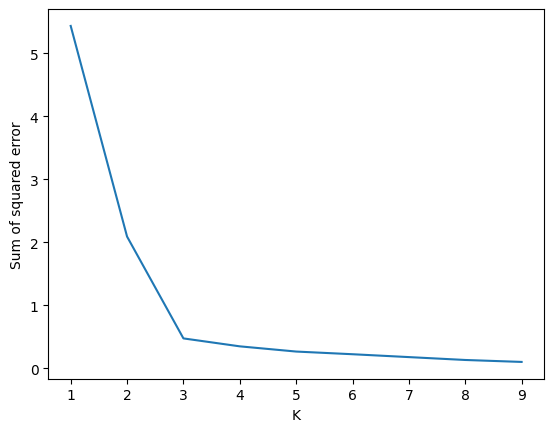

In [11]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)